# Part II - ( Correlation Survived people between age and gender in Titanic)
## by (Garavaliyev)

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

> Provide a brief overview of the dataset to be presented here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('titanic.csv')
df.Cabin = df.Cabin.fillna("Lost")
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [3]:
df = df.dropna() 
df = df.drop(['Ticket'], axis=1)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> I am making the visualtion which shows us age and survived people in Titanic.

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
Cabin          712 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


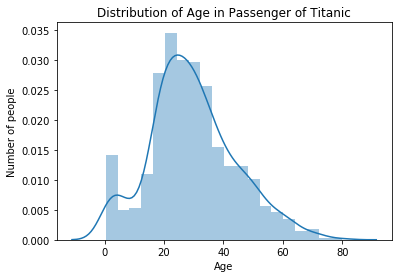

In [5]:
sns.distplot(df['Age'])
plt.title('Distribution of Age in Passenger of Titanic')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

We can see that mostly people are between 20-40 ages in the data

## (Visualization 2)

> Below you can see Bivariate Exploration to show us correlation between other variables.

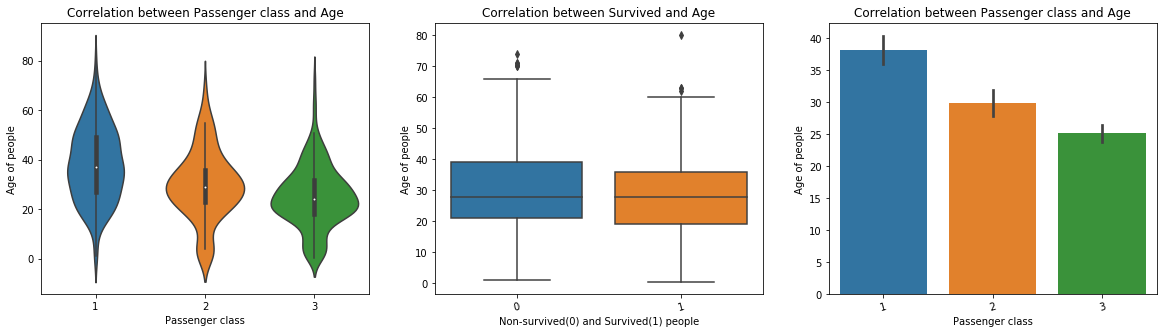

In [6]:


plt.figure(figsize = [20, 5])

# left plot: violin plot
plt.subplot(1, 3, 1)
sns.violinplot(data=df, x='Pclass', y='Age') # include label rotation due to small subplot size
plt.title('Correlation between Passenger class and Age')
plt.ylabel('Age of people')
plt.xlabel('Passenger class')
# center plot: box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Survived', y='Age')# we create boxplot to show correct mean and outliers in the data
plt.xticks(rotation=15);
plt.xlabel('Non-survived(0) and Survived(1) people')
plt.ylabel('Age of people')
plt.title('Correlation between Survived and Age');
# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sns.barplot(data=df, x='Pclass', y='Age')
plt.xticks(rotation = 15);
plt.title('Correlation between Passenger class and Age')
plt.ylabel('Age of people')
plt.xlabel('Passenger class');


plt.show()

In the plot, we see that thirs class passengers are younger than other. In the second plot it is shown that most of survived people also are younger than other.

Survived
Sex    Pclass          
female 1       0.963855
       2       0.918919
       3       0.460784
male   1       0.396040
       2       0.151515
       3       0.150198

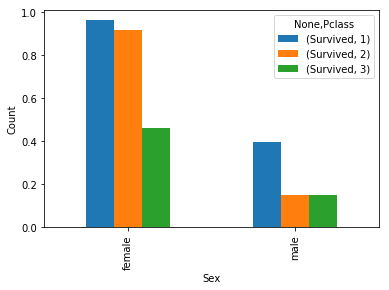

In [7]:
df.groupby(['Sex', 'Pclass'])[['Survived']].mean().unstack().plot(kind='bar').set_ylabel('Count')
df.groupby(['Sex', 'Pclass'])[['Survived']].mean()

Bar plot and table give us information about the average of survived people between gender and passenger class

## (Visualization 3)



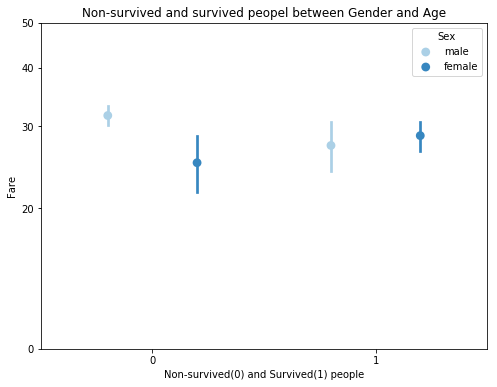

In [8]:
ig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = df, y = 'Age', x = 'Survived', hue = 'Sex',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Non-survived and survived peopel between Gender and Age')
plt.ylabel('Fare')
plt.xlabel('Non-survived(0) and Survived(1) people')
plt.yscale('log')
plt.yticks([10, 20, 30, 40, 50 ], ['0', '20', '30', '40','50'])
ax.set_yticklabels([],minor = True)
plt.show();

We can see all information about the Survived and Non-survived people comparison with gender and fare.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 380387 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
